In [1]:
import pandas as pd
data= pd.read_csv("TrainingDataCifar10ResnetSize50.csv")
data_test=pd.read_csv("TestingDataCifar10ResnetSize50.csv")

# Classifier

In [2]:
#github
classLabel = "Class Label"

X = data.drop(classLabel,axis = 1).values
Y = data[classLabel].values

X_t= data_test.drop(classLabel,axis = 1).values
y_test= data_test[classLabel].values

In [3]:
Features = data.drop(classLabel,axis = 1).columns.values
#features=list(Features.columns.values)
print(Features)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49']


In [ ]:
pip install sklearn

You should consider upgrading via the 'C:\Users\jowens\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=7dbc2812cce9de8ce038459c4564dbfc73f8d36e99090e5b11ab9270ac864eb1
  Stored in directory: c:\users\jowens\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [4]:
from sklearn.preprocessing import LabelBinarizer
#custom code
Y_train=LabelBinarizer().fit_transform(Y)
Y_test=LabelBinarizer().fit_transform(y_test)

In [5]:
pip install scikit-XCS

     |████████████████████████████████| 316 kB 3.1 MB/s 
  Created wheel for scikit-XCS: filename=scikit_XCS-1.0.7-py3-none-any.whl size=35944 sha256=39db3c198eae432e8ef656881f1d90f84efa4b58cd1438a3d80d20b0b9f349b9
  Stored in directory: /root/.cache/pip/wheels/10/5e/44/b99e55f3c73e70da959ec35518bd4209acd37be839d55815e8
Successfully built scikit-XCS


In [5]:
from skXCS import XCS
model = XCS(N=10000, learning_iterations = 50000,nu = 10)
trainedModel = model.fit(X,Y)

# Rule Data

In [6]:
trainedModel.export_iteration_tracking_data("iterationData_fashionmnist_Resnet_50_XCS.csv")

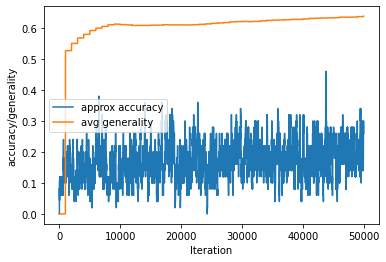

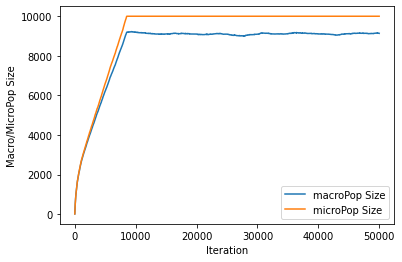

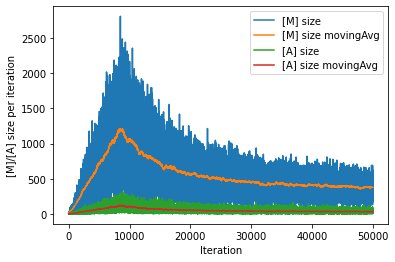

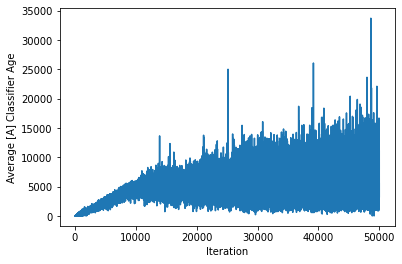

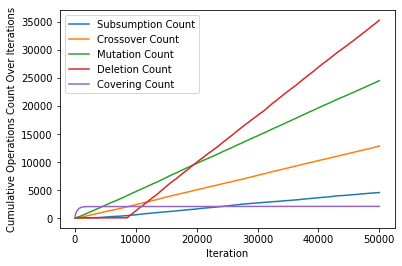

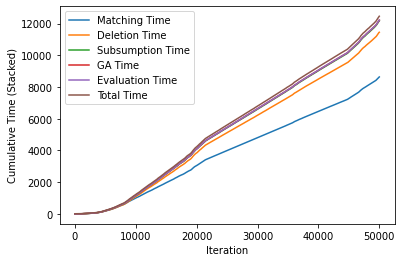

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_fashionmnist_Resnet_50_XCS.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
aSize = dataTracking["Action Set Size"].values
experience = dataTracking["Average Iteration Age of Action Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total GA Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,aSize,label="[A] size")
plt.plot(iterations,movingAvg(aSize),label="[A] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[A] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [A] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="GA Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [8]:
trainedModel.export_final_rule_population("RulePopulationfashionmnistResnet50_XCS.csv",Features,classLabel)

populationData2 = pd.read_csv("RulePopulationfashionmnistResnet50_XCS.csv")
display(populationData2)

,0,1,2,3,4,5,6,7,8,9,...,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"-1.9153924899999997,1.1410016099999998",#,"-2.6606100270000006,1.5751722270000004",#,"-2.872785842,-0.46504335799999996",#,"0.09254004350000011,1.9698549564999999","-1.2185412720000002,1.653762792","-1.9987363905,0.13666369049999993","-1.5532106625000002,1.7162684425",...,369.679995,2.097686e-17,1,35.158844,49577,0,0.54,0.000014,33,399
1,#,#,"-1.9468899340000003,2.6739634340000005",#,"-2.142119475,0.43760461500000003","-0.76540915,1.47675203","-1.6559112534999998,0.3508736534999999",#,"-1.449206859,1.232458359",#,...,0.000000,1.000000e+00,2,54.183673,48475,1,0.56,0.000042,35,516
2,#,#,"-1.2069978510000001,2.515356251",#,"-2.370533567,1.470388967","-0.7174717500000003,3.01946355","-1.047673519,2.448016319","-1.67531828,0.18636028000000004",#,#,...,141.890173,3.023269e-13,1,59.879783,48977,3,0.52,0.000023,21,213
3,#,"-4.502591323,-1.809186277","-1.1107300725000002,2.4190884725000004","-0.1445006440000003,4.193771244000001","-1.825925148,0.9257805480000001",#,#,"-2.526371336,1.0374133360000002",#,"-1.2637126625000001,1.0187538825",...,0.000000,1.000000e+00,1,86.000000,21112,3,0.52,0.000033,1,7
4,"-1.8620819650000002,0.2984724850000001","-4.206973696,-2.1048039039999997",#,"1.1314616759999998,2.917808924",#,#,#,#,#,"-1.2020243775000001,0.9570655975000001",...,0.000000,1.000000e+00,1,55.000000,16987,3,0.42,0.000021,4,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9131,"-1.54238162,1.93558408",#,#,#,#,#,#,#,#,#,...,0.000000,1.000000e+00,1,65.758783,49996,49996,0.36,0.000026,0,0
9132,#,"-1.995862540851866,0.6103673070000002",#,#,"-1.628191136,1.6828991370000002","-1.601370034,2.6297439650000003",#,"-1.2416873800000001,2.21571566","-1.649039191,0.2950187674999999",#,...,0.000000,1.000000e+00,1,27.750000,49997,49997,0.28,0.000011,0,0
9133,#,#,"-0.5912248055000002,3.8370930055",#,#,#,#,#,#,"-2.2700841,0.1974473000000001",...,0.000000,1.000000e+00,1,33.874797,49997,49997,0.20,0.000013,0,0
9134,#,"-1.239634715,0.402685435",#,"-0.47779469799999996,1.4999468980000001",#,"-0.09156699499999998,1.456591915",#,"0.21885079600000013,1.1743904479999998","-1.1510579785,0.3884164985",#,...,0.000000,1.000000e+00,1,54.747200,49998,49998,0.48,0.000021,0,0


In [9]:
trainedModel.export_final_rule_population_DCAL("RulePopulationfashionmnistResnet502_XCS.csv",Features,classLabel)

populationData3 = pd.read_csv("RulePopulationfashionmnistResnet502_XCS.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,Class Label,Fitness,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"[-1.9153924899999997,1.1410016099999998], [-2....","0, 2, 4, 6, 7, 8, 9, 11, 12, 15, 16, 17, 18, 1...",5,0.004816,367.459106,369.679995,2.097686e-17,1,35.158844,49577,0,0.54,0.000014,33,399
1,"[-1.9468899340000003,2.6739634340000005], [-2....","2, 4, 5, 6, 8, 10, 12, 14, 15, 17, 20, 21, 22,...",3,0.149362,0.000000,0.000000,1.000000e+00,2,54.183673,48475,1,0.56,0.000042,35,516
2,"[-1.2069978510000001,2.515356251], [-2.3705335...","2, 4, 5, 6, 7, 10, 14, 16, 22, 23, 24, 25, 27,...",1,0.003922,72.572874,141.890173,3.023269e-13,1,59.879783,48977,3,0.52,0.000023,21,213
3,"[-4.502591323,-1.809186277], [-1.1107300725000...","1, 2, 3, 4, 7, 9, 10, 11, 18, 19, 23, 24, 25, ...",7,0.013882,0.000000,0.000000,1.000000e+00,1,86.000000,21112,3,0.52,0.000033,1,7
4,"[-1.8620819650000002,0.2984724850000001], [-4....","0, 1, 3, 9, 10, 11, 13, 15, 16, 17, 21, 23, 24...",4,0.079797,0.000000,0.000000,1.000000e+00,1,55.000000,16987,3,0.42,0.000021,4,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9131,"[-1.54238162,1.93558408], [-2.669660064,1.4382...","0, 10, 11, 12, 14, 15, 16, 18, 20, 24, 28, 31,...",9,0.004066,0.002788,0.000000,1.000000e+00,1,65.758783,49996,49996,0.36,0.000026,0,0
9132,"[-1.995862540851866,0.6103673070000002], [-1.6...","1, 4, 5, 7, 8, 14, 18, 25, 29, 32, 36, 44, 46, 48",5,0.011285,0.000000,0.000000,1.000000e+00,1,27.750000,49997,49997,0.28,0.000011,0,0
9133,"[-0.5912248055000002,3.8370930055], [-2.270084...","2, 9, 14, 20, 28, 29, 32, 35, 36, 42",5,0.011285,0.000000,0.000000,1.000000e+00,1,33.874797,49997,49997,0.20,0.000013,0,0
9134,"[-1.239634715,0.402685435], [-0.47779469799999...","1, 3, 5, 7, 8, 11, 12, 13, 16, 17, 22, 23, 24,...",9,0.010657,100.000000,0.000000,1.000000e+00,1,54.747200,49998,49998,0.48,0.000021,0,0


# ROC and PRC Curves

## 0-49

### ROC and PRC Curves 0-9 

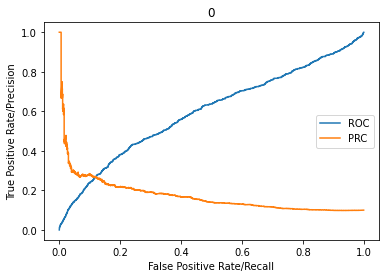

PRC AUC:0.17373161187026093
ROC AUC:0.5978262222222221


In [10]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(X_t)
fpr1, tpr1, thresholds1 = roc_curve(Y_test[:,0], probs[:,0])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test[:,0], probs[:,0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

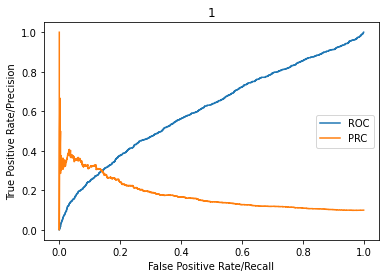

PRC AUC:0.17649078361758153
ROC AUC:0.6100126666666666


In [11]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(Y_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('1')
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

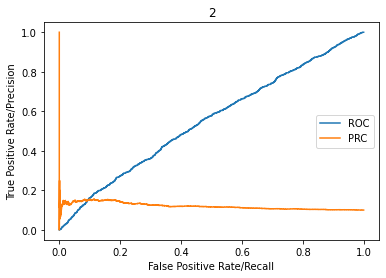

PRC AUC:0.1199521865953647
ROC AUC:0.5529367777777777


In [12]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(Y_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('2')
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

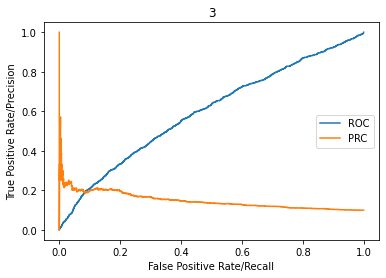

PRC AUC:0.14798475248937706
ROC AUC:0.5976677222222222


In [13]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test[:,3], probs[:, 3])
prec4, recall4, thresholds4 = precision_recall_curve(Y_test[:,3], probs[:, 3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('3')
plt.show()

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

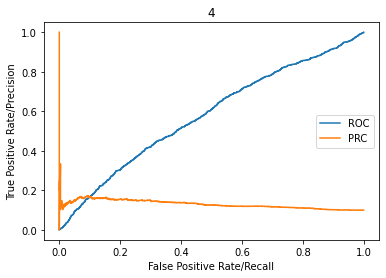

PRC AUC:0.12972562651091113
ROC AUC:0.5800868888888889


In [14]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test[:,4], probs[:, 4])
prec5, recall5, thresholds5 = precision_recall_curve(Y_test[:,4], probs[:, 4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('4')
plt.show()

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

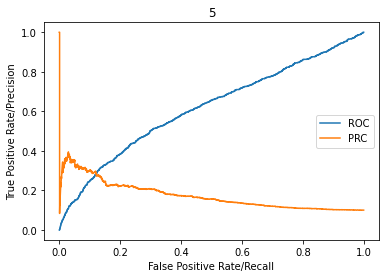

PRC AUC:0.173849170970531
ROC AUC:0.6168851111111111


In [15]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test[:,5], probs[:, 5])
prec6, recall6, thresholds6 = precision_recall_curve(Y_test[:,5], probs[:, 5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('5')
plt.show()

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

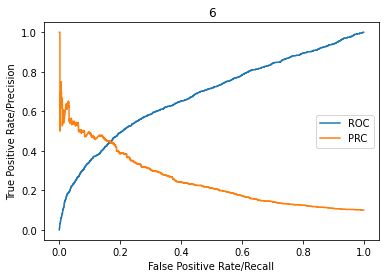

PRC AUC:0.25535465780885275
ROC AUC:0.6812202222222222


In [16]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test[:,6], probs[:, 6])
prec7, recall7, thresholds7 = precision_recall_curve(Y_test[:,6], probs[:, 6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('6')
plt.show()

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

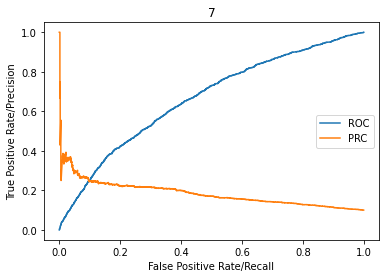

PRC AUC:0.18504365305690312
ROC AUC:0.6635627777777777


In [17]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test[:,7], probs[:, 7])
prec8, recall8, thresholds8 = precision_recall_curve(Y_test[:,7], probs[:, 7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('7')
plt.show()

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

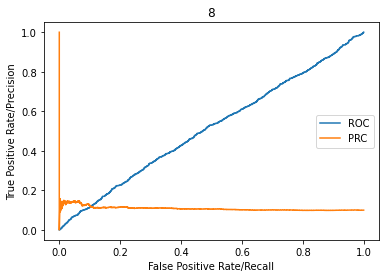

PRC AUC:0.10793179173744338
ROC AUC:0.5149611111111111


In [18]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test[:,8], probs[:, 8])
prec9, recall9, thresholds9 = precision_recall_curve(Y_test[:,8], probs[:, 8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('8')
plt.show()

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

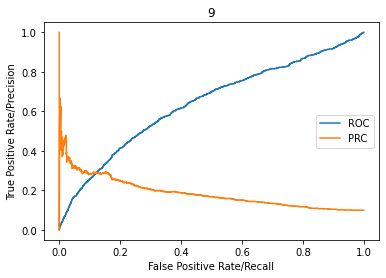

PRC AUC:0.18575646931759587
ROC AUC:0.6394917777777778


In [19]:
fpr10, tpr10, thresholds10 = roc_curve(Y_test[:,9], probs[:, 9])
prec10, recall10, thresholds10 = precision_recall_curve(Y_test[:,9], probs[:, 9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('9')
plt.show()

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))